In [155]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [156]:
# MNIST DATASETS
# convert mnist image files into tensor of 4dimensions
transform = transforms.ToTensor()

In [157]:
# Train data
train_data =  datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)

In [158]:
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform=transform)

In [159]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [160]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [161]:
# Create a small batch size for images = 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [162]:
# define our CNN model ------ just description
conv1 = nn.Conv2d(1, 6, 3, 1) # 6 outputs features
conv2 = nn.Conv2d(6, 16, 3, 1) 

In [163]:
# take an image
X_train = 0
y_train = 0
for i,(X_train, y_train) in enumerate(train_data):
    break

In [164]:
X_train.shape

torch.Size([1, 28, 28])

In [165]:
x = X_train.view(1,1,28,28)

In [166]:
x = F.relu(conv1(x))
x.shape # 1 image, 6 feature maps, 26x26 image

torch.Size([1, 6, 26, 26])

In [167]:
x = F.max_pool2d(x,2,2) # kernel 2 and stride 2
x.shape

torch.Size([1, 6, 13, 13])

In [168]:
x = F.relu(conv2(x))
x.shape # 

torch.Size([1, 16, 11, 11])

In [169]:
x = F.max_pool2d(x,2,2) # kernel 2 and stride 2
x.shape

torch.Size([1, 16, 5, 5])

In [170]:
class ConvolutionalNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = X.view(-1, 16*5*5)
        
        X = F.relu(self.fc1(X))
        X = F.relu((self.fc2(X)))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1)

In [171]:
torch.manual_seed(41)
model = ConvolutionalNN()
model

ConvolutionalNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [172]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [173]:
import time
start = time.time()

# Tracking
epochs = 25
train_losses = []
test_losses = []
train_correct = []
test_correct = [] 
loss = 0

for i in range(epochs):
    trn_correct = 0
    tst_correct = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1 #batches at 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_correct += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if b % 6000 == 0:
            #print something
            print(f'Epoch: {i} \t Batch: {b} \t Loss: {loss.item()}')
        
    train_losses.append(loss)
    train_correct.append(trn_correct)
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_correct += (predicted == y_test).sum()
    
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_correct)

current = time.time()
total = current - start
print(f'Training took: {total/60} minutes!')

Epoch: 0 	 Batch: 6000 	 Loss: 0.0003325246798340231
Epoch: 1 	 Batch: 6000 	 Loss: 0.22035114467144012
Epoch: 2 	 Batch: 6000 	 Loss: 0.2725798785686493
Epoch: 3 	 Batch: 6000 	 Loss: 0.004776805639266968
Epoch: 4 	 Batch: 6000 	 Loss: 0.00015996303409337997
Epoch: 5 	 Batch: 6000 	 Loss: 0.00015914073446765542
Epoch: 6 	 Batch: 6000 	 Loss: 1.2039867639541626
Epoch: 7 	 Batch: 6000 	 Loss: 0.004288967233151197
Epoch: 8 	 Batch: 6000 	 Loss: 0.01096893846988678
Epoch: 9 	 Batch: 6000 	 Loss: 9.174186561722308e-05
Epoch: 10 	 Batch: 6000 	 Loss: 2.4769153242232278e-05
Epoch: 11 	 Batch: 6000 	 Loss: 1.5984693163773045e-05
Epoch: 12 	 Batch: 6000 	 Loss: 5.960448561381781e-07
Epoch: 13 	 Batch: 6000 	 Loss: 1.3327097803994548e-05
Epoch: 14 	 Batch: 6000 	 Loss: 0.005799924489110708
Epoch: 15 	 Batch: 6000 	 Loss: 9.47674379858654e-06
Epoch: 16 	 Batch: 6000 	 Loss: 1.6689287463123037e-07
Epoch: 17 	 Batch: 6000 	 Loss: 3.7669426546926843e-06
Epoch: 18 	 Batch: 6000 	 Loss: 7.33225897420

In [174]:
train_losses = [tl.item() for tl in train_losses]

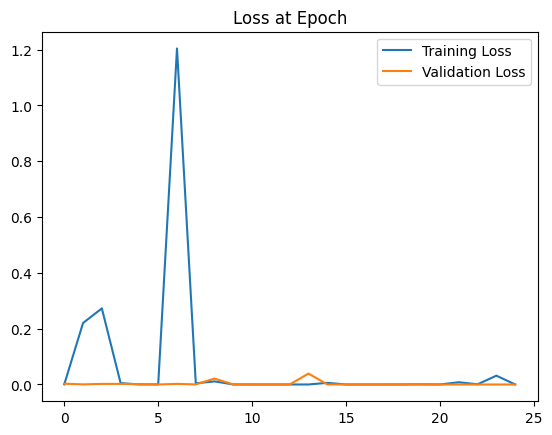

In [175]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses,label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

Text(0.5, 1.0, 'Accuracy at the end of each epoch')

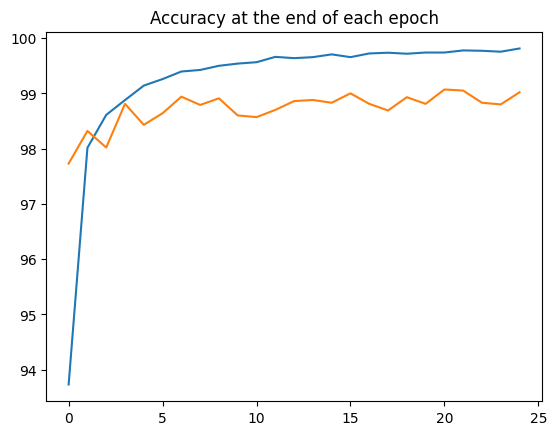

In [176]:
# graph accuracy of each epoch
plt.plot([t/600 for t in train_correct], label="Training accuracy")
plt.plot([t/100 for t in test_correct], label="Validation accuracy")
plt.title("Accuracy at the end of each epoch")

In [177]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [178]:
print(str(correct.item()/len(test_data)*100) + "%")

99.02%


tensor(9)

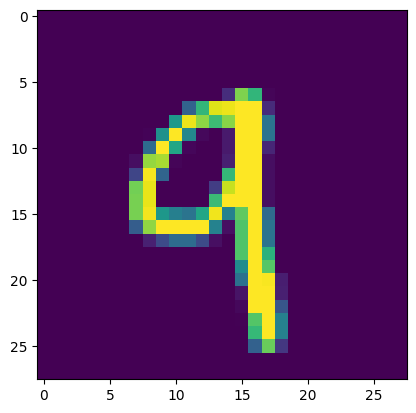

In [190]:
image = 414

#print(test_data[image]) #tensor with an image and the label
#print(test_data[image][0]) #no label
# RESHAPE
test_data[image][0].reshape(28,28)

plt.imshow(test_data[image][0].reshape(28,28))

model.eval()
with torch.no_grad():
    new_prediction = model(test_data[image][0].view(1,1,28,28))
    
new_prediction.argmax()